<a href="https://colab.research.google.com/github/manijenkins/DataMining/blob/feature_assignment/DL_WithDropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import random
import numpy as np
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers



In [42]:
random.seed(42)
np.random.seed(42)

tf.random.set_seed(42)


# ***DataSet***

In [43]:
mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

In [44]:
# Datasets Size

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [45]:
#Print Sample data

print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

Xtrain 
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  24 209 254 254 254
 171   0   0   0   0   0   0   0   0   0]
Xtest 
 [  0   0   0   0   0   0   0   0 194 254 103   0   0   0   0   0   0   0
   0   0 150 254 213   0   0   0   0   0]
Ytrain 
 3
Ytest 
 0


In [46]:
#Normalize the Data

Xtrain = Xtrain.reshape((60000, 28*28)) #reshapping the input to size 28 * 28 60000 -- no images 28*28=784(vector length(1 image coverted as vector))
Xtrain = Xtrain.astype('float32')/255  #normalize to gray scale. That is values between 0 to 1

Xtest = Xtest.reshape((10000, 28*28))
Xtest = Xtest.astype('float32')/255

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)


In [47]:
# print sample data
print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

Xtrain 
 0.0
Xtest 
 0.0
Ytrain 
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Ytest 
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# **DNN Model**

In [48]:
#Using Keras, create DNN or Sequential

#create a model object

dnnModel = models.Sequential()


In [49]:
#layer 1 - Input layer
#Specify the input size

dnnModel.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))

#Layer -2 - Hidden Layer
dnnModel.add(layers.Dense(60, activation='relu'))

#Add dropout of 50% to layer 2
dnnModel.add(layers.Dropout(0.5))

#Layer -3 - Hidden Layer
dnnModel.add(layers.Dense(30, activation='relu'))

#Add dropout of 50% to layer 3
dnnModel.add(layers.Dropout(0.5))

#Layer -4 - Output Layer
dnnModel.add(layers.Dense(10, activation='softmax'))

dnnModel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_9 (Dense)              (None, 60)                3060      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1830      
_________________________________________________________________
dropout_3 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                310       
Total params: 44,450
Trainable params: 44,450
Non-trainable params: 0
__________________________________________________

In [71]:
#Regualarization and Optimizations of DNN

dnnModel.compile(optimizer=  'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [75]:
#Train the model

h = dnnModel.fit( Xtrain, Ytrain, validation_split=0.2, epochs=25, batch_size=64)

Epoch 1/25
750/750 [==============================] - 2s 2ms/step - loss: 0.1319 - accuracy: 0.9667 - val_loss: 0.0928 - val_accuracy: 0.9795
Epoch 2/25
750/750 [==============================] - 2s 2ms/step - loss: 0.1113 - accuracy: 0.9682 - val_loss: 0.0839 - val_accuracy: 0.9803
Epoch 3/25
750/750 [==============================] - 2s 2ms/step - loss: 0.1014 - accuracy: 0.9687 - val_loss: 0.0972 - val_accuracy: 0.9804
Epoch 4/25
750/750 [==============================] - 2s 2ms/step - loss: 0.0983 - accuracy: 0.9702 - val_loss: 0.1044 - val_accuracy: 0.9793
Epoch 5/25
750/750 [==============================] - 2s 2ms/step - loss: 0.0980 - accuracy: 0.9687 - val_loss: 0.0942 - val_accuracy: 0.9818
Epoch 6/25
750/750 [==============================] - 2s 2ms/step - loss: 0.0913 - accuracy: 0.9718 - val_loss: 0.0944 - val_accuracy: 0.9778
Epoch 7/25
750/750 [==============================] - 2s 2ms/step - loss: 0.0939 - accuracy: 0.9710 - val_loss: 0.1048 - val_accuracy: 0.9790
Epoch 

In [76]:
print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy', h.history['accuracy'][-1])
print (h.history.keys())

Final training loss 	 0.07956739515066147
Final training accuracy 0.9754583239555359
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


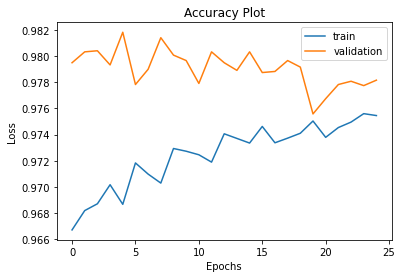

In [77]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'], label='train')
plt.plot(h.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy Plot')
plt.legend()
plt.show()

In [78]:
#Testing the model

testLoss, testAccuracy = dnnModel.evaluate(Xtest, Ytest)

313/313 [==============================] - 0s 883us/step - loss: 0.2707 - accuracy: 0.9731


In [79]:
print('Testing Loss \t', testLoss)
print('Testing Accuracy \t', testAccuracy)


Testing Loss 	 0.27074211835861206
Testing Accuracy 	 0.9731000065803528
